# When do we use a Box Plot?

A **box plot** is used during **Exploratory Data Analysis (EDA)** to visualize the distribution of numerical data and to detect outliers using the **Interquartile Range (IQR)**.

## 🔹 When to Use a Box Plot
- To identify **outliers**
- To understand **data spread** (Q1, Median, Q3)
- To detect **skewness** in the data
- To compare distributions across categories
- Before applying **outlier treatment techniques**

## 🔹 Why Box Plot?
- Robust to **extreme values**
- Works well for **non-normal distributions**
- Easy to interpret and quick to analyze

## 🔹 Best Use Cases
- Numerical features (age, salary, price, CGPA, etc.)
- Early-stage **data exploration**
- Models sensitive to outliers (e.g., Linear Regression, KNN)

## 🔹 When Not Ideal
- Very small datasets
- Time-series analysis
- High-dimensional data without grouping

## 🧠 ML Note
Box plots help improve **model stability and performance** by revealing extreme values that may negatively affect learning.


###### What is a Percentile?
A percentile indicates the value below which a given percentage of data points fall.

![Box Plot Example](boxPlot.png)

## Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


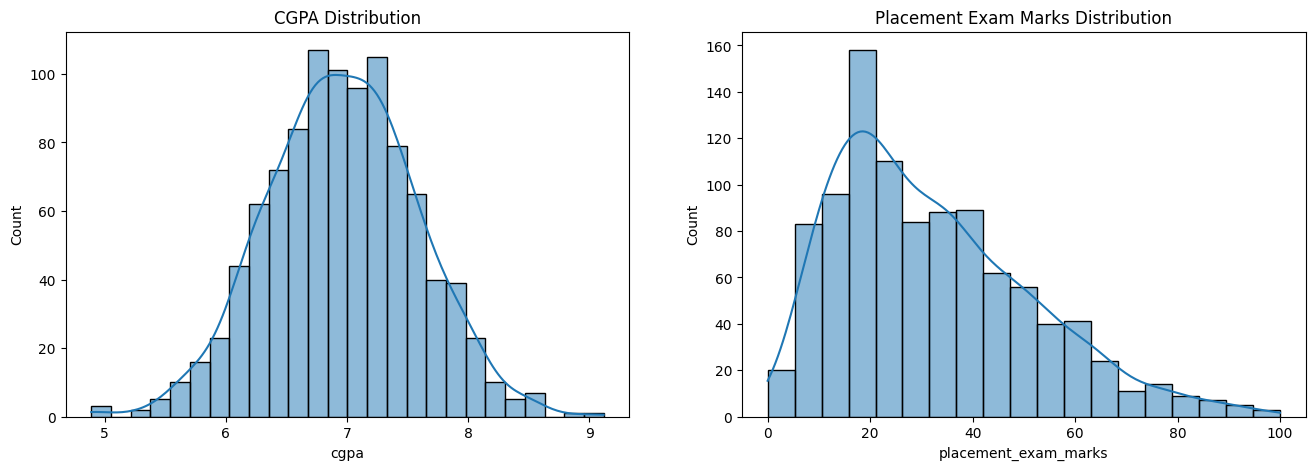

In [4]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title("CGPA Distribution")

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("Placement Exam Marks Distribution")

plt.show()

In [5]:
# plt.subplot(rows, columns, index)

In [6]:
df['cgpa'].skew()

-0.014529938929314918

In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

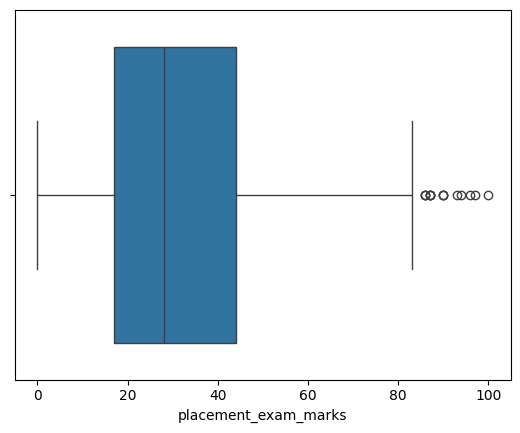

In [9]:
sns.boxplot(x=df['placement_exam_marks'])
plt.show()

In [10]:
# Calculate Q1, Q3, and IQR
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [11]:
Q1,Q3

(17.0, 44.0)

In [12]:
IQR = Q3-Q1

In [13]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [14]:
lower_bound, upper_bound

(-23.5, 84.5)

In [15]:
outliers = df[
    (df['placement_exam_marks'] < lower_bound) |
    (df['placement_exam_marks'] > upper_bound)
]

In [16]:
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


#### Trimming

In [17]:
df_iqr_removed = df[
    (df['placement_exam_marks'] >= lower_bound) &
    (df['placement_exam_marks'] <= upper_bound)
]

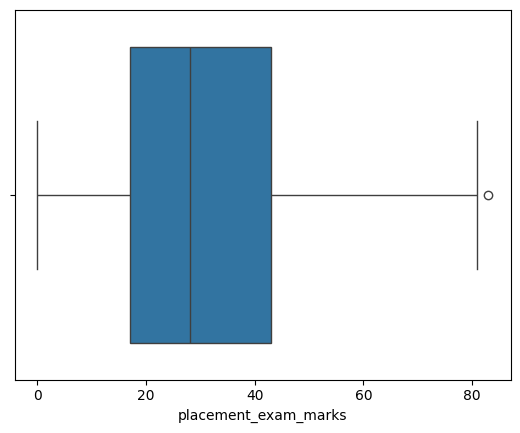

In [18]:
sns.boxplot(x=df_iqr_removed['placement_exam_marks'])
plt.show()

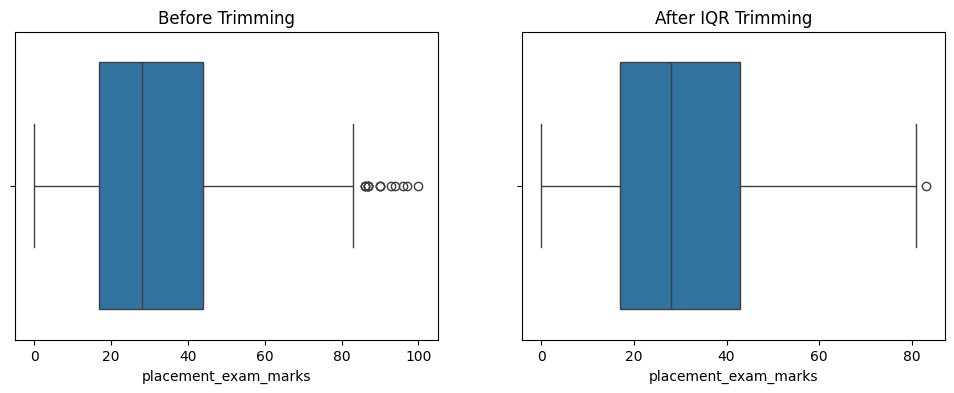

In [19]:
# Before vs After

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['placement_exam_marks'])
plt.title("Before Trimming")

plt.subplot(1,2,2)
sns.boxplot(x=df_iqr_removed['placement_exam_marks'])
plt.title("After IQR Trimming")

plt.show()

#### capping(Recommended here)

In [20]:
df_before = df.copy()

In [21]:
df['placement_exam_marks'] = df['placement_exam_marks'].clip(
    lower=lower_bound,
    upper=upper_bound
)

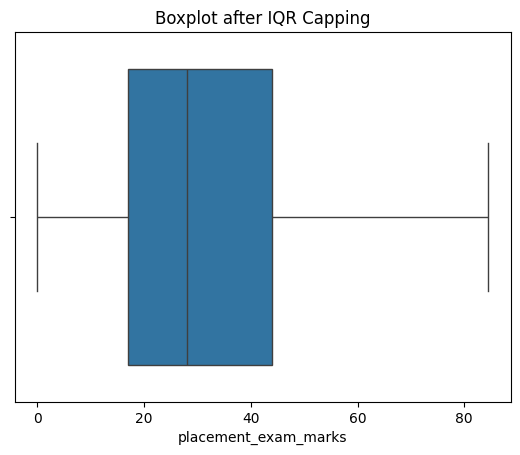

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['placement_exam_marks'])
plt.title("Boxplot after IQR Capping")
plt.show()

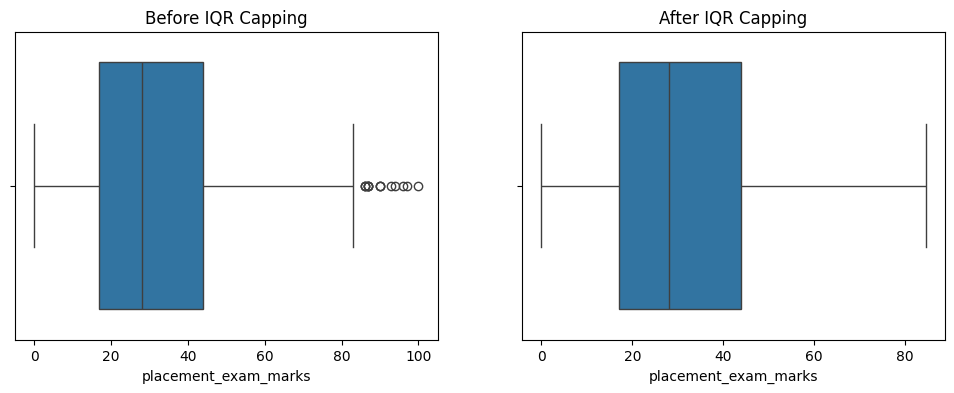

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(x=df_before['placement_exam_marks'], ax=axes[0])
axes[0].set_title("Before IQR Capping")

sns.boxplot(x=df['placement_exam_marks'], ax=axes[1])
axes[1].set_title("After IQR Capping")

plt.show()

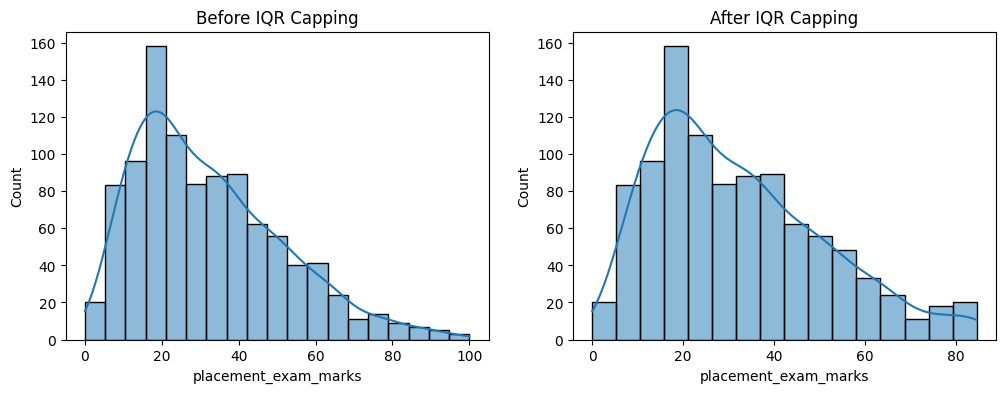

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df_before['placement_exam_marks'], kde=True)
plt.title("Before IQR Capping")

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("After IQR Capping")

plt.show()